In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Python/факультатив/LB4/train.csv')

Узнаем размеры таблицы:

In [3]:
data.shape

(891, 12)

Мы можем посмотреть на несколько первых и несколько последних строк этой
таблицы, чтобы получить представление об имеющихся данных:

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


С помощью метода describe() получим некоторую сводную информацию по всей
таблице.

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Выделим числовые и категориальные признаки:

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Теперь мы можем получить некоторую общую информацию по категориальным
признакам:

In [8]:
 data[categorical_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
data[numerical_columns].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
 data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
for c in categorical_columns: 
  print(data[c].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

Диаграмма рассеяния:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2733ffeb0>,
      dtype=object)

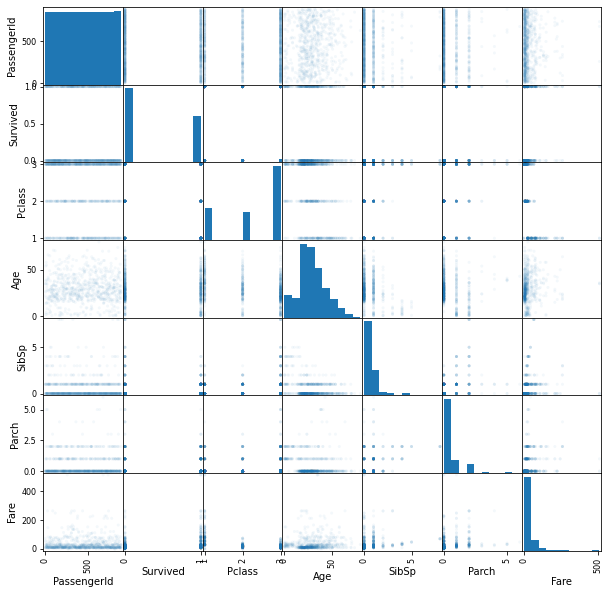

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10))

Корреляционная матрица:

In [13]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Подготовка данных**

*Пропущенные значения*

Узнать количество заполненных (непропущенных) элементов можно с помощью
метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху
вниз), а не размерности 1 (слева направо), т.е. нас интересует количество
заполненных элементов в каждом столбце, а не строке:

In [14]:
data.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.
axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [15]:
data = data.fillna(data.median(axis=0), axis=0)

<ipython-input-15-4634965d352c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis=0), axis=0)


In [16]:
data.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

*Категориальные признаки*

In [17]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
  data[c] = data[c].fillna(data_describe[c]['top'])

In [18]:
data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Векторизация*

Выделим бинарные и небинарные признаки:

In [20]:
binary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Name', 'Ticket', 'Cabin', 'Embarked']


*Бинарные признаки*

In [21]:
for c in binary_columns:
  top = data_describe[c]['top']
  top_items = data[c] == top
  data.loc[top_items, c] = 0
  data.loc[np.logical_not(top_items), c] = 1
data[binary_columns].describe()

,Sex
count,891
unique,2
top,0
freq,577


*Небинарные признаки*

In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       'Name_Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Name_Adahl, Mr. Mauritz Nils Martin', 'Name_Adams, Mr. John',
       'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Name_Aks, Mrs. Sam (Leah Rosen)', 'Name_Albimona, Mr. Nassef Cassem',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1722)


*Нормализация количественных признаков*

Каждый количественный признак приведем к
нулевому среднему и единичному среднеквадратичному отклонению:

In [24]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,-1.794300e-17,-7.575933e-17,2.232906e-16,3.588600e-17,4.585433e-17,-1.196200e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729137e+00,-7.888293e-01,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-8.645684e-01,-7.888293e-01,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,0.000000e+00,-7.888293e-01,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.645684e-01,1.266279e+00,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,1.729137e+00,1.266279e+00,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00


Соединим все столбцы в одну таблицу:

In [28]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(891, 1730)
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex', 'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1730)


In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,6.379733e-17,-1.794300e-17,-7.575933e-17,2.232906e-16,3.588600e-17,4.585433e-17,-1.196200e-17,0.352413,0.001122,0.001122,...,0.002245,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.725028
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.477990,0.033501,0.033501,...,0.047351,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.446751
min,-1.729137e+00,-7.888293e-01,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.645684e-01,-7.888293e-01,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,-7.888293e-01,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.645684e-01,1.266279e+00,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.729137e+00,1.266279e+00,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
data.to_csv('/content/drive/MyDrive/Python/факультатив/LB4/datalab4.csv', sep='\t', encoding='utf-8')